In [2]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm

In [3]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
df = pd.read_csv('data/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('data/summer-travel-gps-dbscan.csv', encoding='utf-8')

In [4]:
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [5]:
rs.head()

,lat,lon,date,city,country
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


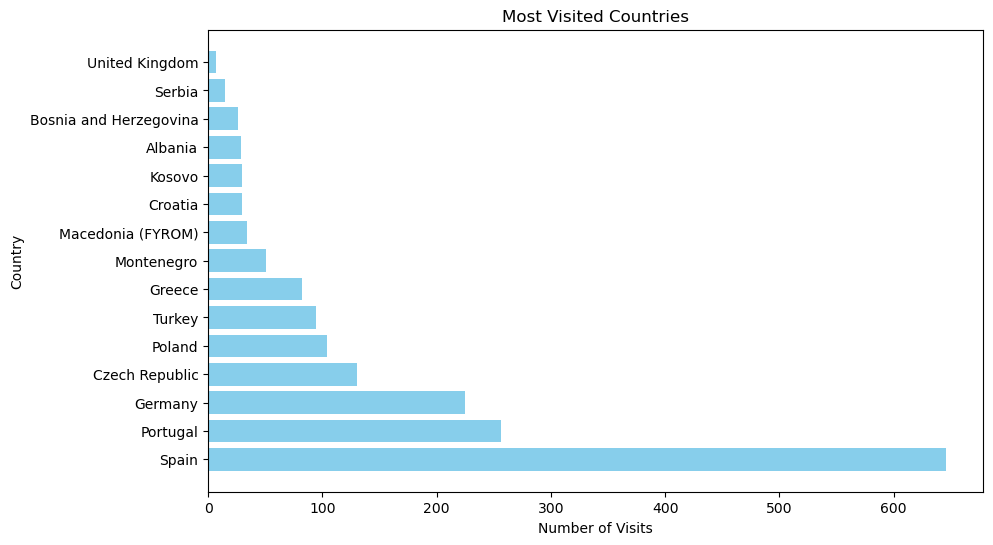

In [6]:
# Q1: Can you draw a bar chart for the most visited countries by using matplotlib and seaborn? You can use the df dataframe.
# Please style the chart to make it look nicer
# such as figsize, width, alpha, color, edgecolor, grid, xlim, and ylim

visits = df['country'].value_counts()
visits= visits.sort_values(ascending=False)

visits_df = pd.DataFrame(visits).reset_index()
visits_df.columns = ['Country', 'Visits']


plt.figure(figsize=(10, 6))
plt.barh(visits_df['Country'], visits_df['Visits'], color='skyblue')
plt.xlabel('Number of Visits')
plt.ylabel('Country')
plt.title('Most Visited Countries')
plt.show()


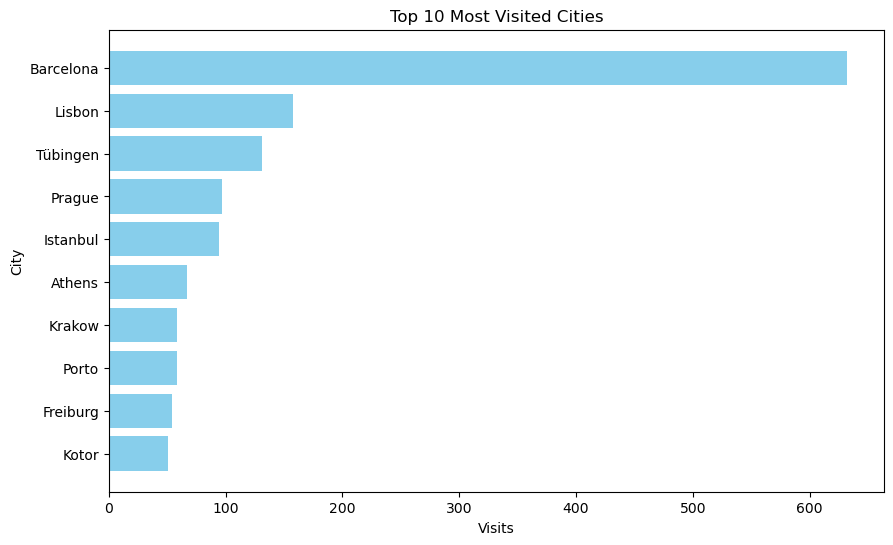

In [7]:
cities = df['city'].value_counts().sort_values(ascending=False)
top = cities.head(10)


plt.figure(figsize=(10, 6))
plt.barh(top.index, top.values, color='skyblue')
plt.xlabel('Visits')
plt.ylabel('City')
plt.title('Top 10 Most Visited Cities')
plt.gca().invert_yaxis()  
plt.show()


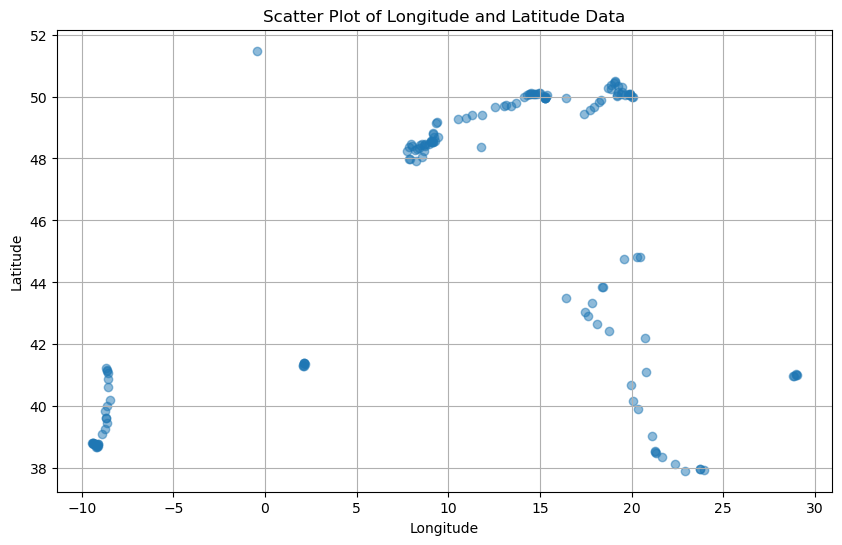

In [8]:
# Q3: Draw a scatter plot the longitude and latitude data, with matplotlib and seaborn defaults. 
# You can use the rs dataframe.
# Please style the chart to make it look nicer with good size and alpha settings.
plt.figure(figsize=(10, 6))
plt.scatter(rs['lon'], rs['lat'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude and Latitude Data')
plt.grid(True)  
plt.show()


In [9]:
# get the count of records by date
countdata = df.groupby(df.index.date).size()
countdata.head()

2014-05-14    36
2014-05-15    61
2014-05-16    57
2014-05-17    64
2014-05-18    50
dtype: int64

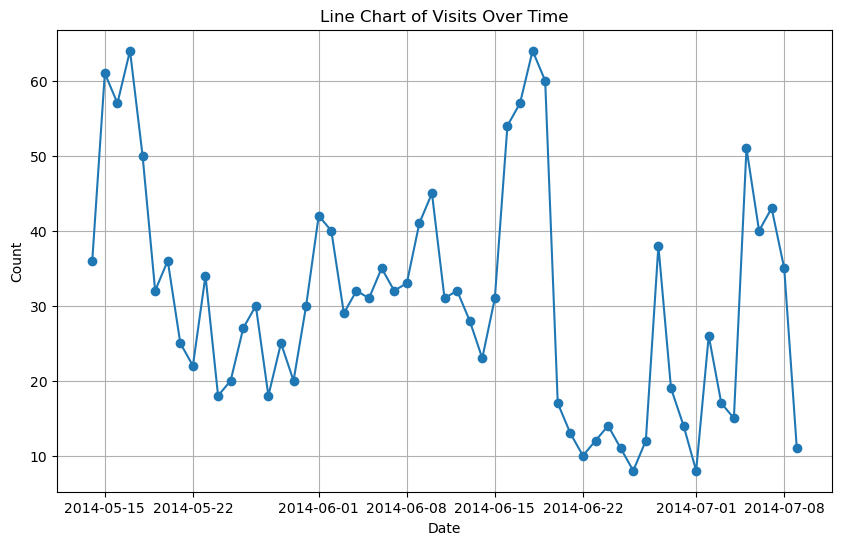

In [10]:
# Q4: Draw a  matplotlib and seaborn line chart from countdata. 
# Please style the chart to make it look nicer with good size and alpha settings. 
plt.figure(figsize=(10, 6))
plt.plot(countdata, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Line Chart of Visits Over Time')
plt.grid(True)  
plt.show()


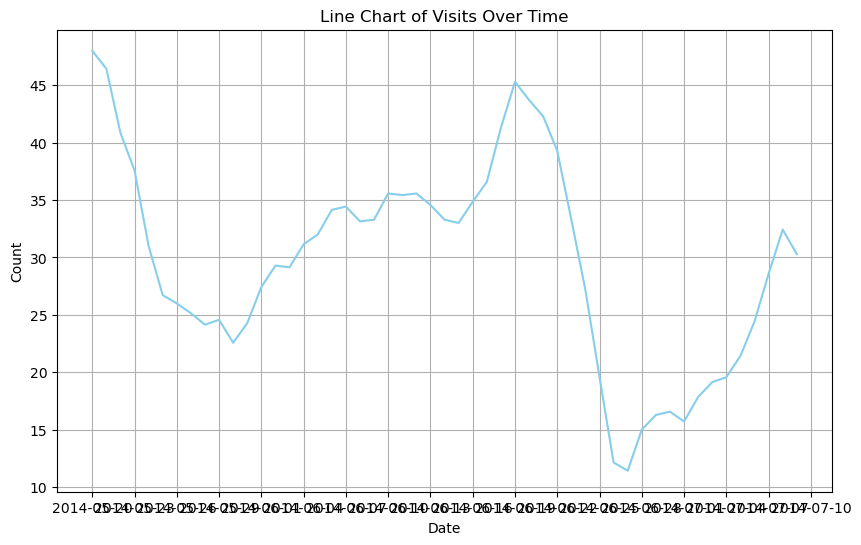

In [11]:
# Q5: Now you try: re-create the plot above with different line widths, colors, and point markers. 
# Play with moving the annotation labels around. Make the vertical tick marks 3 days apart instead of 5.
# experiment with a more advanced challenge like smoothing the line:
# - https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
# - https://stackoverflow.com/questions/25825946/generating-smooth-line-graph-using-matplotlib
import matplotlib.dates as mdates
plt.figure(figsize=(10, 6))
smoothed_data = countdata.rolling(window=7).mean()
plt.plot(smoothed_data, color='skyblue')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Line Chart of Visits Over Time')
plt.grid(True)  
plt.show()


In [12]:
cities = df['city'].value_counts()
print(cities.count())
cities.head()

113


city
Barcelona    632
Lisbon       158
Tübingen     131
Prague        97
Istanbul      94
Name: count, dtype: int64

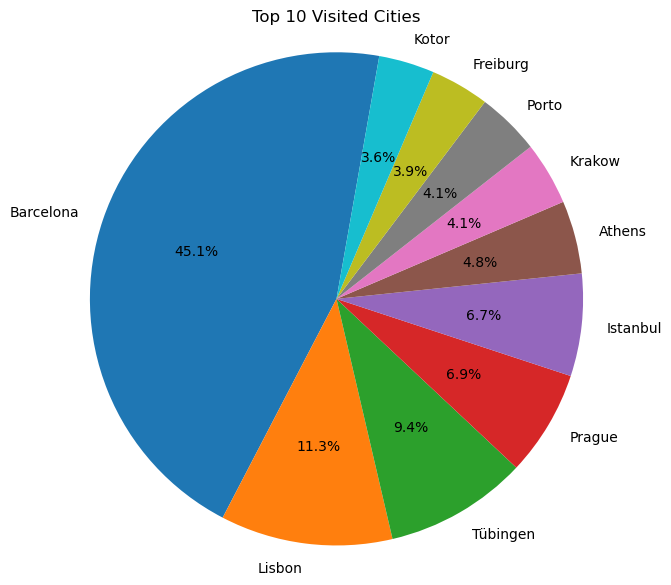

In [20]:
# Q6: draw a pie chart for cities.
# Please style the chart to make it look nicer. 
import matplotlib.pyplot as plt
counts = df['city'].value_counts()
cities = counts.head(10)
plt.figure(figsize=(7, 7))
plt.pie(cities, labels=cities.index, autopct='%1.1f%%', startangle=80, colors=plt.cm.tab10.colors)
plt.axis('equal')  
plt.title('Top 10 Visited Cities')
plt.show()


In [21]:
# Q7: can you visualize the GPS points by using Kepler.gl? 
# Here are some examples: https://docs.kepler.gl/docs/keplergl-jupyter
from keplergl import KeplerGl
map1 = KeplerGl(height=600)
map1.add_data(data=df, name='gps_data')
map1


ModuleNotFoundError: No module named 'keplergl'